# Exploratory Data Analysis

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scikitplot as skplt

In [88]:
df = pd.read_parquet('../datasets/var_finacieras2.parquet', engine='fastparquet')

In [96]:
df.head(10)

,DIM_CUENTAS,CUPONES_3M,MET_PESOS_SALDOS_VTO,MET_ZETA_SALDOS_VTO,MET_DOLAR_SALDOS_VTO,MET_LIMITE_SM,MET_LIMITE_CPL,MET_LIMITE_TC,MET_LIMITE_AE,MET_LIMITE_ZETA,...,Fecha,max_atraso,vl_ingresos_actualizados,vl_deuda_sistema,nu_entidades_TC,nu_entidades,cd_entidad_principal,rel_deud_ingresos,INGRESO_ESTIMADO,perfil_deudor
0,151,9.0,408.83,0.00,0.0,16000.0,54000.0,72000.0,1100.0,48000.0,...,202007,0.0,NaN,6.358974,1.0,2.0,285,NaN,NaN,1
1,152,NaN,539.21,0.00,0.0,69000.0,206000.0,254000.0,60000.0,207000.0,...,202007,0.0,66787.0,1.743590,0.0,2.0,285,0.002036,69584.0,1
2,182,2.0,-246.92,0.00,0.0,15000.0,35000.0,40000.0,0.0,40000.0,...,202007,0.0,NaN,6.435897,0.0,3.0,11,NaN,NaN,1
3,199,NaN,288.18,0.00,0.0,12500.0,44800.0,62500.0,6000.0,37500.0,...,202007,0.0,NaN,0.076923,0.0,1.0,285,NaN,NaN,1
4,212,2.0,600.29,0.00,0.0,19000.0,57000.0,75000.0,28500.0,57000.0,...,202007,0.0,26015.0,0.064103,1.0,1.0,70147,0.000192,21263.0,1
5,279,1.0,2485.32,0.00,0.0,32000.0,79200.0,99400.0,28300.0,96000.0,...,202007,0.0,13589.0,2.089744,0.0,1.0,285,0.011995,24604.0,1
6,295,2.0,383.71,5004.16,0.0,3600.0,5800.0,5800.0,2900.0,5800.0,...,202007,0.0,16309.0,0.294872,1.0,3.0,44,0.001410,16138.0,1
7,332,1.0,352.28,0.00,0.0,7300.0,25600.0,32900.0,25600.0,21900.0,...,202007,0.0,21781.0,NaN,NaN,NaN,-11111,NaN,23479.0,0
8,532,NaN,381.69,0.00,0.0,5300.0,18600.0,23900.0,18600.0,15900.0,...,202007,0.0,33757.0,0.128205,0.0,1.0,55088,0.000296,28940.0,1
9,1317,2.0,348.26,0.00,0.0,22000.0,65000.0,88000.0,32500.0,66000.0,...,202007,0.0,18677.0,0.038462,1.0,1.0,70408,0.000161,20512.0,1


In [90]:
df['Fecha'] = df['Fecha'].fillna(-1)

In [91]:
df['Fecha'] = df['Fecha'].astype(int)

In [92]:
df['cd_entidad_principal'].isnull().sum()

123962

In [93]:
df['cd_entidad_principal'] = df['cd_entidad_principal'].fillna(-11111)

In [94]:
df['cd_entidad_principal'] = df['cd_entidad_principal'].astype(int)

In [95]:
df['perfil_deudor'] = df.cd_entidad_principal.apply(lambda x: 1 if x != -11111 else 0)

In [2]:
df = pd.read_parquet('../datasets/var_finacieras.parquet', engine='fastparquet')

In [3]:
df.head()

,DIM_CUENTAS,CUPONES_3M,MET_PESOS_SALDOS_VTO,MET_ZETA_SALDOS_VTO,MET_DOLAR_SALDOS_VTO,MET_LIMITE_SM,MET_LIMITE_CPL,MET_LIMITE_TC,MET_LIMITE_AE,MET_LIMITE_ZETA,...,MESESINACTIVIDAD,CANTADICIONALES,ANTIGUEDAD,max_atraso,vl_ingresos_actualizados,vl_deuda_sistema,nu_entidades_TC,nu_entidades,cd_entidad_principal,rel_deud_ingresos
0,151,9,408.83,0.0,0.0,16000.0,54000.0,72000.0,1100.0,48000.0,...,18,1,53,0,-1.0,6.358974,1,2,285,-1.000000
1,152,0,539.21,0.0,0.0,69000.0,206000.0,254000.0,60000.0,207000.0,...,7,0,204,0,66787.0,1.743590,0,2,285,0.002036
2,182,2,-246.92,0.0,0.0,15000.0,35000.0,40000.0,0.0,40000.0,...,10,0,23,0,-1.0,6.435897,0,3,11,-1.000000
3,199,0,288.18,0.0,0.0,12500.0,44800.0,62500.0,6000.0,37500.0,...,16,1,229,0,-1.0,0.076923,0,1,285,-1.000000
4,212,2,600.29,0.0,0.0,19000.0,57000.0,75000.0,28500.0,57000.0,...,16,0,53,0,26015.0,0.064103,1,1,70147,0.000192


In [4]:
df.shape

(338976, 25)

In [5]:
df.duplicated().sum()

3565

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(335411, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335411 entries, 0 to 338975
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   DIM_CUENTAS               335411 non-null  int32         
 1   CUPONES_3M                335411 non-null  int32         
 2   MET_PESOS_SALDOS_VTO      335411 non-null  float64       
 3   MET_ZETA_SALDOS_VTO       335411 non-null  float64       
 4   MET_DOLAR_SALDOS_VTO      335411 non-null  float64       
 5   MET_LIMITE_SM             335411 non-null  float64       
 6   MET_LIMITE_CPL            335411 non-null  float64       
 7   MET_LIMITE_TC             335411 non-null  float64       
 8   MET_LIMITE_AE             335411 non-null  float64       
 9   MET_LIMITE_ZETA           335411 non-null  float64       
 10  EMITE_RESUMEN             335411 non-null  object        
 11  ATR_FECHA_ULTIMO_RESUMEN  335411 non-null  datetime64[ns]
 12  TI

In [9]:
df.isnull().sum()

DIM_CUENTAS                 0
CUPONES_3M                  0
MET_PESOS_SALDOS_VTO        0
MET_ZETA_SALDOS_VTO         0
MET_DOLAR_SALDOS_VTO        0
MET_LIMITE_SM               0
MET_LIMITE_CPL              0
MET_LIMITE_TC               0
MET_LIMITE_AE               0
MET_LIMITE_ZETA             0
EMITE_RESUMEN               0
ATR_FECHA_ULTIMO_RESUMEN    0
TIPOINACTIVO                0
RENTABILIDAD                0
DNI                         0
MESESINACTIVIDAD            0
CANTADICIONALES             0
ANTIGUEDAD                  0
max_atraso                  0
vl_ingresos_actualizados    0
vl_deuda_sistema            0
nu_entidades_TC             0
nu_entidades                0
cd_entidad_principal        0
rel_deud_ingresos           0
dtype: int64

In [10]:
df.columns = df.columns.str.lower()

In [11]:
lista_columnas = df.columns.to_list()

In [13]:
df = df[[
 'dim_cuentas',
 'cupones_3m',
 'met_pesos_saldos_vto',
 'met_zeta_saldos_vto',
 'met_dolar_saldos_vto',
 'met_limite_sm',
 'met_limite_cpl',
 'met_limite_tc',
 'met_limite_ae',
 'met_limite_zeta',
 'rentabilidad',
 'dni',
 'mesesinactividad',
 'cantadicionales',
 'antiguedad',
 'max_atraso',
 'vl_ingresos_actualizados',
 'vl_deuda_sistema',
 'nu_entidades_tc',
 'nu_entidades',
 'cd_entidad_principal',
 'rel_deud_ingresos']]

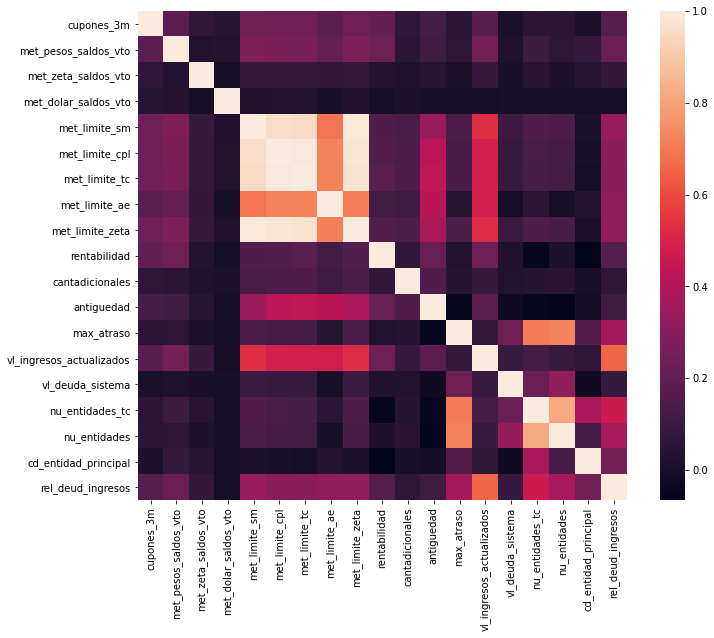

In [16]:
corrmat = df.drop(['dim_cuentas', 'dni'], axis = 1).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [12]:
df.reset_index(drop=True, inplace = True)

In [13]:
def escala_datos(method,df):
    if method == 'minmax':
        minmax = MinMaxScaler()
        df_to_scale = df.drop(['dim_cuentas'], axis = 1)
        data_minmax = minmax.fit_transform(df_to_scale)
        scaled_df = pd.DataFrame(data_minmax, columns = df_to_scale.columns.to_list())
        scaled_df.insert(0, 'dim_cuentas', df['dim_cuentas'].astype(int))
    
    elif method == 'standard':
        sc = StandardScaler()
        df_to_scale = df.drop(['dim_cuentas'], axis = 1)
        data_scaled = sc.fit_transform(df_to_scale)
        scaled_df = pd.DataFrame(data_scaled, columns = df_to_scale.columns.to_list())
        scaled_df.insert(0, 'dim_cuentas', df['dim_cuentas'].astype(int))
    
    else:
        return 'No se selecciono metodo. Puede usar minmax o standard'
    
    return scaled_df, sc


In [14]:
scaled_df = escala_datos('standard',df)

In [15]:
scaled_df.head()

,dim_cuentas,cupones_rank_1,cupones_rank_2,cupones_rank_3,cupones_rank_4,cupones_rank_5,importe_genuino,importe_total,ingreso_estimado,avg_ingreso_estimado_6m,q_reclamos_nol_3m,q_reclamos_call_3m,q_reclamos_fisico_3m,ratio_impgen_imptotal
0,111896,-0.664688,-0.229266,-0.09758,-0.049602,-0.02655,-0.361514,-0.446655,-0.741380,0.532075,13.581593,1.404662,2.625578,0.00274
1,157357,1.636401,3.010945,-0.09758,-0.049602,-0.02655,1.359901,0.793321,0.047757,-0.007039,6.754438,1.404662,1.152597,0.00274
2,192965,0.485856,1.390839,-0.09758,-0.049602,-0.02655,-0.183111,-0.287439,-0.741380,-0.911893,6.754438,3.107377,4.098558,0.00274
3,557074,-0.089416,-0.229266,-0.09758,-0.049602,-0.02655,0.601427,0.348287,0.406821,0.096335,6.754438,4.810092,1.152597,0.00274
4,648742,1.636401,-0.229266,-0.09758,-0.049602,-0.02655,-0.361514,1.463045,1.194469,0.878891,6.754438,4.810092,8.517500,0.00274


In [16]:
scaled_df.describe() #standarScaler genera que el valor medio de cada variable sea 0 y la desv standar sea 1
                     #Es conveniente usarlo previo a un PCA o una clusterización

,dim_cuentas,cupones_rank_1,cupones_rank_2,cupones_rank_3,cupones_rank_4,cupones_rank_5,importe_genuino,importe_total,ingreso_estimado,avg_ingreso_estimado_6m,q_reclamos_nol_3m,q_reclamos_call_3m,q_reclamos_fisico_3m,ratio_impgen_imptotal
count,3.350790e+05,3.350790e+05,3.350790e+05,3.350790e+05,3.350790e+05,3.350790e+05,3.350790e+05,3.350790e+05,3.350790e+05,3.350790e+05,3.350790e+05,3.350790e+05,3.350790e+05,3.350790e+05
mean,7.732290e+08,-2.171416e-17,8.821376e-18,-7.803525e-18,4.919613e-18,8.991018e-18,-4.749972e-17,1.357135e-18,-3.799977e-17,-6.514247e-17,-3.833906e-17,2.985696e-17,1.262135e-16,1.102672e-18
std,5.554648e+08,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,1.510000e+02,-6.646878e-01,-2.292658e-01,-9.757954e-02,-4.960199e-02,-2.655019e-02,-3.615143e-01,-1.981883e+01,-7.413804e-01,-9.118929e-01,-7.271753e-02,-2.980522e-01,-3.203834e-01,-2.954875e+02
25%,6.688946e+06,-6.646878e-01,-2.292658e-01,-9.757954e-02,-4.960199e-02,-2.655019e-02,-3.615143e-01,-4.466554e-01,-7.413804e-01,-9.118929e-01,-7.271753e-02,-2.980522e-01,-3.203834e-01,2.740178e-03
50%,1.223515e+09,-8.941570e-02,-2.292658e-01,-9.757954e-02,-4.960199e-02,-2.655019e-02,-3.615143e-01,-4.025732e-01,-7.413804e-01,-6.107366e-03,-7.271753e-02,-2.980522e-01,-3.203834e-01,2.740178e-03
75%,1.251726e+09,4.858564e-01,-2.292658e-01,-9.757954e-02,-4.960199e-02,-2.655019e-02,-6.804619e-02,4.494439e-02,5.837803e-01,5.611067e-01,-7.271753e-02,-2.980522e-01,-3.203834e-01,2.740178e-03
max,1.252252e+09,4.593236e+01,5.161410e+01,7.513049e+01,7.070138e+01,9.221736e+01,3.316179e+01,3.793871e+01,4.440121e+01,4.392557e+01,1.091618e+02,3.035081e+01,3.208519e+01,1.314249e+02


In [18]:
# Creating Andrews curves 
x = pd.plotting.andrews_curves(scaled_df.drop(['dim_cuentas'], axis = 1))
x.plot() 
plt.show()

TypeError: andrews_curves() missing 1 required positional argument: 'class_column'

In [38]:
pca = PCA(0.9)
principalComponents = pca.fit_transform(scaled_df.drop(['dim_cuentas'], axis = 1))

In [39]:
principalDf = pd.DataFrame(data = principalComponents)

In [40]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.106931,-0.965887,4.972362,9.771447,-0.415323,-0.839649,8.351285,-1.559240,0.006289,0.152689
1,2.848894,0.800677,2.201687,5.644171,-0.204565,-0.709129,3.154302,-1.371291,-1.233716,-1.504303
2,0.231602,0.755985,4.148629,6.539319,0.403245,-2.809347,2.457151,-0.114450,-0.178259,-0.589578
3,0.941921,-1.147947,3.361555,7.385372,-0.442351,0.126779,1.405329,0.333741,0.531991,0.207826
4,2.191709,-1.702354,6.409281,7.091564,1.417740,-6.346691,1.699184,1.221514,0.518093,-0.048367


In [41]:
pca.explained_variance_ratio_ #cuanta varianza toma cada componente principal. Cuanto mas grande es la suma, mejor

array([0.21746612, 0.12972137, 0.09220004, 0.08035626, 0.07704197,
       0.07538556, 0.0710379 , 0.06876416, 0.06292793, 0.0534249 ])

In [42]:
pca.explained_variance_ratio_ .sum()

0.9283262262930334

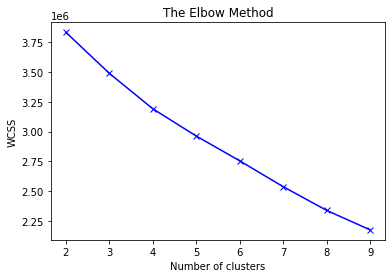

In [24]:
#ELBOW with data_train without scaling
clusters = range(2, 10)
kmeanslist = []
WCSS = [] #Within-Cluster Sum-Squares metric


for cluster in clusters:
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 1)
    kmeans.fit(scaled_df.drop(['dim_cuentas'], axis = 1))
    WCSS.append(kmeans.inertia_)
    kmeanslist.append(kmeans)

    
plt.plot(clusters, WCSS, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

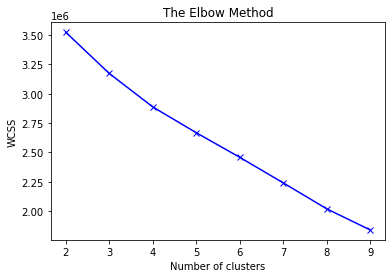

In [43]:
#ELBOW with data_train without scaling
clusters = range(2, 10)
kmeanslist = []
WCSS = [] #Within-Cluster Sum-Squares metric


for cluster in clusters:
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 1)
    kmeans.fit(principalDf)
    WCSS.append(kmeans.inertia_)
    kmeanslist.append(kmeans)

    
plt.plot(clusters, WCSS, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

2_clusters


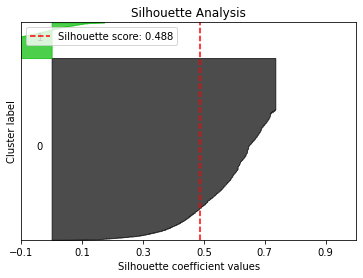

El SS para 2 clusters es de 0.488
3_clusters


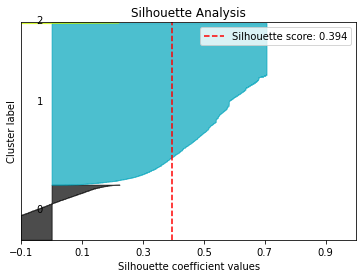

El SS para 3 clusters es de 0.394
4_clusters


KeyboardInterrupt: 

In [44]:
clusters = range(2, 5)
SS = [] #Silhouette metric list
results = {}

for cluster in clusters:
    print("{}_clusters".format(cluster))
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 1)
    kmeans.fit(principalDf)
    cluster_labels = kmeans.fit_predict(principalDf)
    results[cluster] = cluster_labels
    score = silhouette_score(principalDf, labels = cluster_labels, metric='euclidean')
    SS.append(score)
    skplt.metrics.plot_silhouette(principalDf, cluster_labels)
    plt.show()
    print('El SS para {} clusters es de {:.3f}'.format(cluster, score))

In [ ]:
plt.plot(clusters, SS, 'bx-')
plt.title('Silhouette Score for all data')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
clusters_clients = pd.DataFrame({'client_id' : df.client_id,**{'{}_clusters'.format(k) : v for k,v in results.items()}})
clusters_clients.to_csv('clustering_results.csv', index = False)   